![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Private EV Charging Data:
    year  private_ports  private_station_locations
0  2014           3695                       1825
1  2015           4150                       1962
2  2016           5763                       2331
3  2017           6048                       2370
4  2018           6812                       2489
Public EV Charging Data:
    year  public_ports  public_station_locations
0  2013         16619                      6938
1  2014         22470                      9207
2  2015         26532                     10710
3  2016         33165                     13150
4  2017         45789                     16170
EV Sales Data:
       Vehicle  year    sales
0  Chevy Volt  2011   7671.0
1  Chevy Volt  2012  23461.0
2  Chevy Volt  2013  23094.0
3  Chevy Volt  2014  18805.0
4  Chevy Volt  2015  15393.0
Total EV sales in 2018: 361315.0
Yearly EV Sales Data:
    year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0
5  20

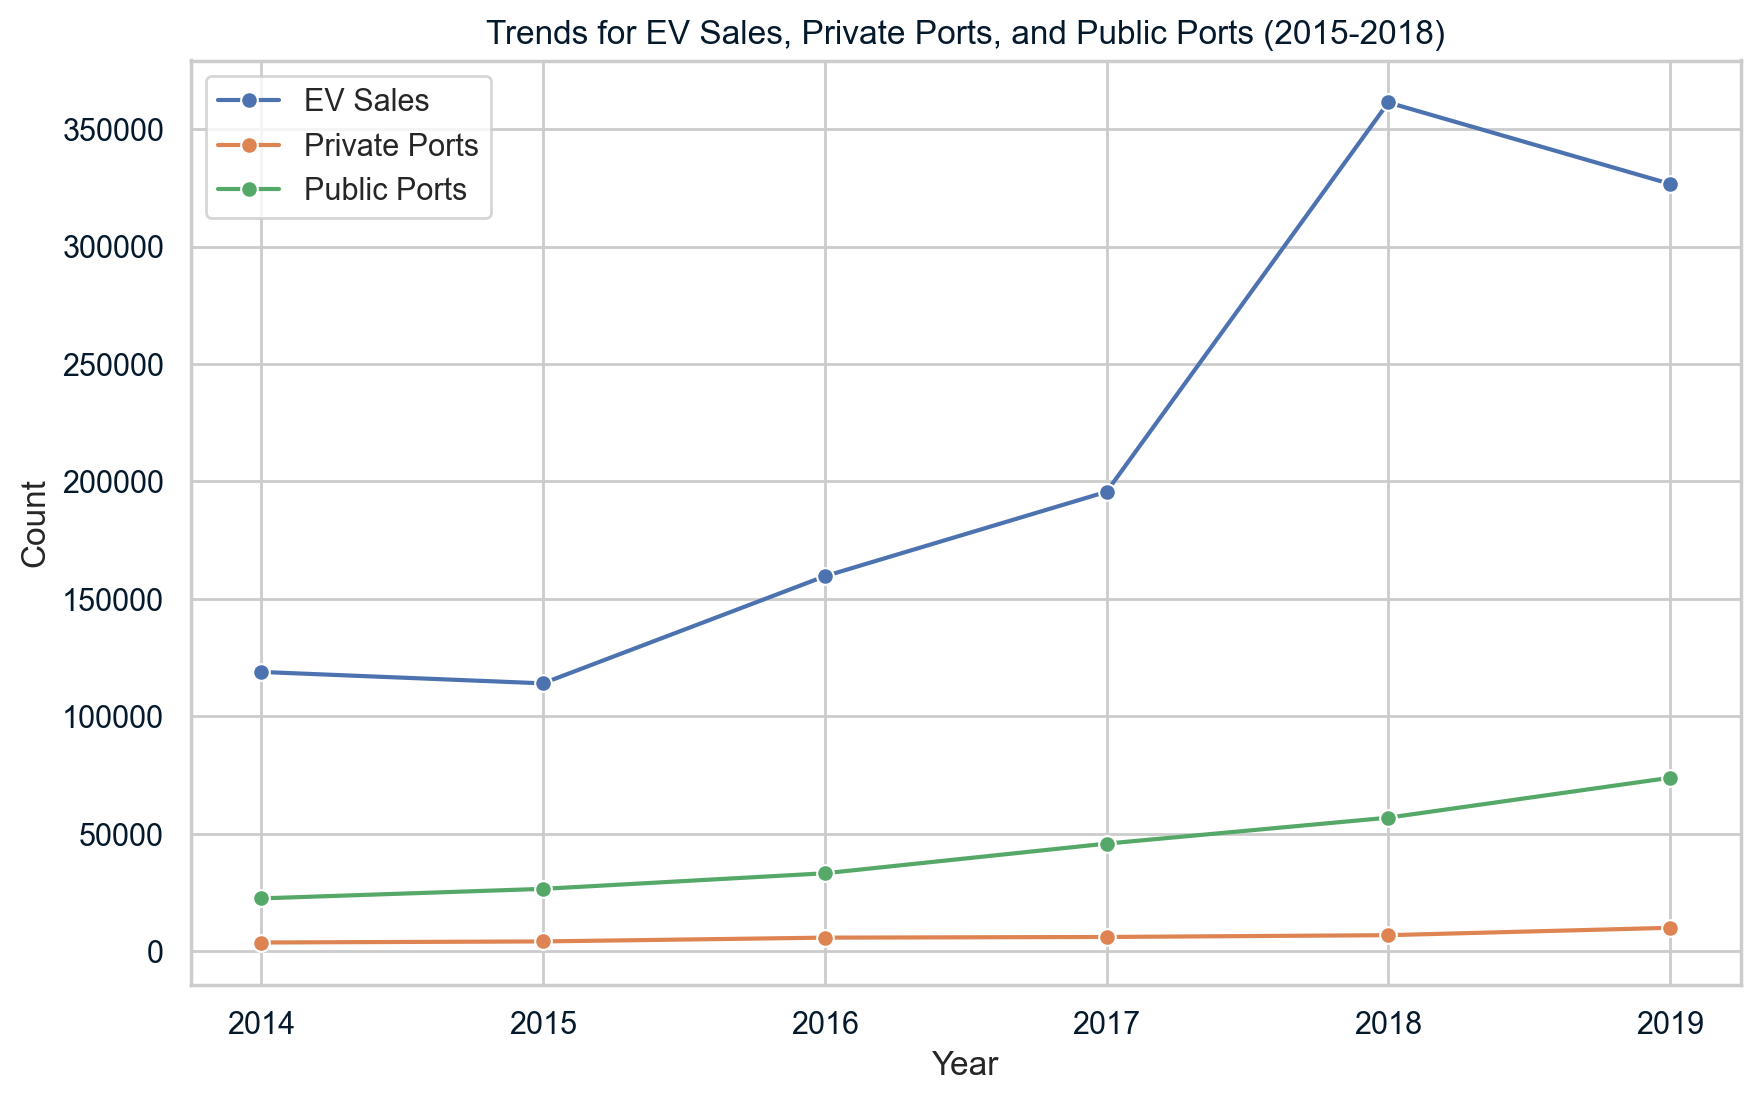

Trend from 2015 to 2018 is: same


In [4]:
# Start coding here

# Load the datasets
private_ev_charging = pd.read_csv('private_ev_charging.csv')
public_ev_charging = pd.read_csv('public_ev_charging.csv')
ev_sales = pd.read_csv('ev_sales.csv')

# Preview the data
print("Private EV Charging Data:\n", private_ev_charging.head())
print("Public EV Charging Data:\n", public_ev_charging.head())
print("EV Sales Data:\n", ev_sales.head())

# Step 1: Calculate total EV sales for 2018
ev_sales_2018 = ev_sales[ev_sales['year'] == 2018]['sales'].sum()
print("Total EV sales in 2018:", ev_sales_2018)

# Step 2: Aggregate yearly sales data
yearly_sales = ev_sales.groupby('year')['sales'].sum().reset_index()
print("Yearly EV Sales Data:\n", yearly_sales)

# Step 3: Merge the datasets on 'year'
# Rename columns for clarity before merging
private_ev_charging = private_ev_charging.rename(columns={'private_ports': 'private_ports', 'year': 'year'})
public_ev_charging = public_ev_charging.rename(columns={'public_ports': 'public_ports', 'year': 'year'})

# Merge data on the 'year' column
combined_data = yearly_sales.merge(private_ev_charging, on='year', how='inner').merge(public_ev_charging, on='year', how='inner')
print("Combined Data:\n", combined_data)

# Step 4: Plot trends for private ports, public ports, and sales
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each trend on the same plot
sns.lineplot(data=combined_data, x='year', y='sales', marker='o', label='EV Sales', ax=ax)
sns.lineplot(data=combined_data, x='year', y='private_ports', marker='o', label='Private Ports', ax=ax)
sns.lineplot(data=combined_data, x='year', y='public_ports', marker='o', label='Public Ports', ax=ax)

# Customize the plot
ax.set(title='Trends for EV Sales, Private Ports, and Public Ports (2015-2018)',
       xlabel='Year', ylabel='Count')
plt.legend()
plt.show()

# Step 5: Determine if trends are the same or different from 2015 to 2018
# Check if the trends for sales, private ports, and public ports are the same
trend = "same" if (combined_data.loc[combined_data['year'] == 2015, 'sales'].values[0] < ev_sales_2018 and
                   combined_data.loc[combined_data['year'] == 2015, 'private_ports'].values[0] < combined_data['private_ports'].iloc[-1] and
                   combined_data.loc[combined_data['year'] == 2015, 'public_ports'].values[0] < combined_data['public_ports'].iloc[-1]) else "different"

print("Trend from 2015 to 2018 is:", trend)
